In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
from polire.random.random import Random
from polire.trend.trend import Trend
from polire.spline.bspline import BSpline
from polire.gp.gp import GaussianProcess
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
import seaborn as sns
import sys

In [96]:
df = pd.read_csv("../testdata/daily_44201_2018.csv")

In [97]:
df.head(3)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,21,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,30,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,41,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12


In [98]:
some_value = 'Ozone'
df = df.loc[df['Parameter Name'] == some_value]

some_value = '2018-05-07'
df = df.loc[df['Date Local'] == some_value]

df = df.sample(frac=1)
df.shape

(1240, 29)

In [99]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
206097,26,121,39,44201,1,43.278061,-86.311083,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,44,NaN,-,NaN,1340 GREEN CREEK ROAD,Michigan,Muskegon,Muskegon,"Muskegon, MI",2019-03-13
286471,39,85,7,44201,1,41.726811,-81.242156,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,40,NaN,-,Painesville,177 MAIN STREET,Ohio,Lake,Painesville,"Cleveland-Elyria, OH",2019-01-29
148750,18,43,1004,44201,1,38.307913,-85.834313,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,49,NaN,-,New Albany- Green Valley Elem. Sch.,2230 GREEN VALLEY ROAD/GREEN VALLEY ELEMENTARY...,Indiana,Floyd,New Albany,"Louisville/Jefferson County, KY-IN",2019-01-16
274091,37,159,21,44201,1,35.551868,-80.395039,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,44,NaN,-,Rockwell,301 WEST ST & GOLD HILL AVENUE,North Carolina,Rowan,Rockwell,"Charlotte-Concord-Gastonia, NC-SC",2019-03-22
96277,8,69,7,44201,3,40.278130,-105.545640,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,71,NaN,-,Rocky Mountain NP - Long's Peak,ROCKY MOUNTAIN NP,Colorado,Larimer,Not in a city,"Fort Collins, CO",2019-03-29


In [100]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [101]:
r = Random(resolution='standard')
trainX = df_train[['Longitude', 'Latitude']].values
trainy = df_train['Arithmetic Mean'].values
r.fit(trainX, trainy)

In [102]:
testX = df_test[['Longitude', 'Latitude']].values
testy = df_test['Arithmetic Mean'].values

In [103]:
x1max, x2max = np.max(trainX, axis=0)
print (x1max, x2max)
x1min, x2min = np.min(trainX, axis=0)

-66.126531 61.598898


In [104]:
x1min, x1max, x2min, x2max

(-158.08861299999998, -66.126531, 18.440774, 61.598898)

In [105]:
lss = [Random(), BSpline(kx=2, ky=2), Trend(order=2), GaussianProcess()]

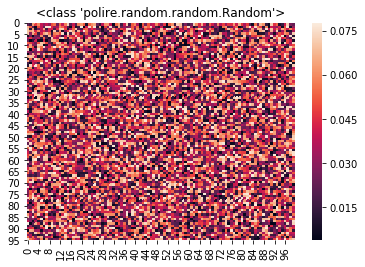

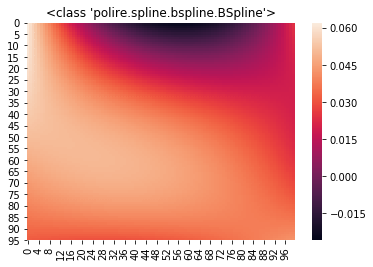

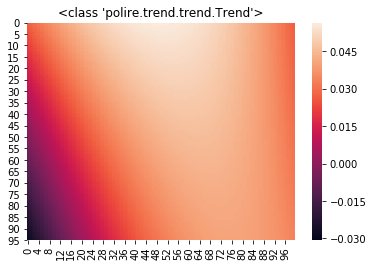

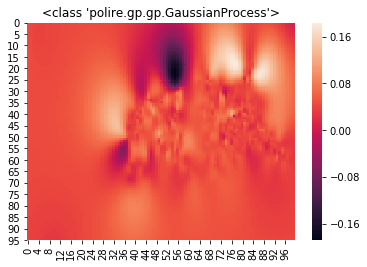

In [106]:
for r in lss:
    r.fit(trainX, trainy)
#     try:
    Z = r.predict_grid((x1min, x1max), (x2min, x2max)).reshape(100, 100)
    sns.heatmap(Z)
    plt.title(r.__class__)
    plt.show()
    plt.close()
#     except:
#         print (f"Was not able to. for {r.__class__}!")


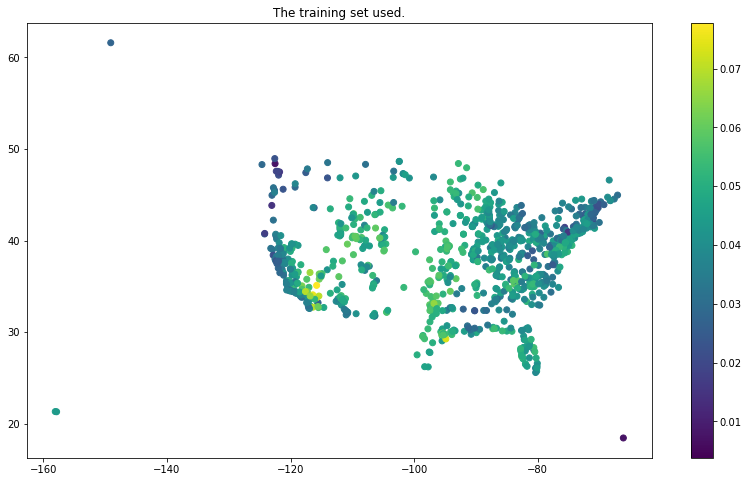

In [107]:
plt.figure(figsize=(14, 8))
h = plt.scatter(trainX[:, 0], trainX[:, 1], c = trainy)
plt.title("The training set used.")
plt.colorbar(h)

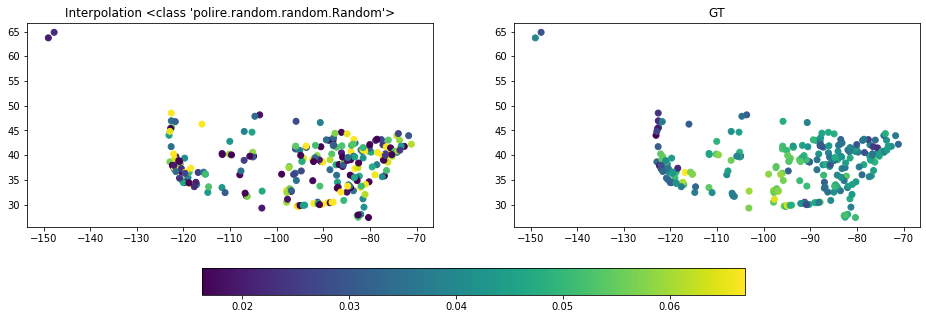

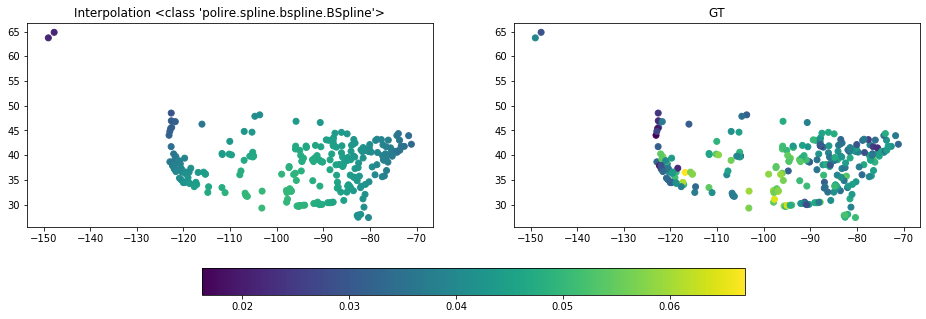

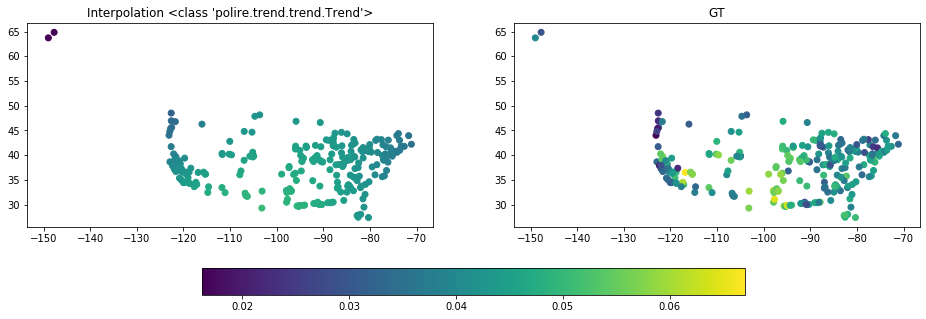

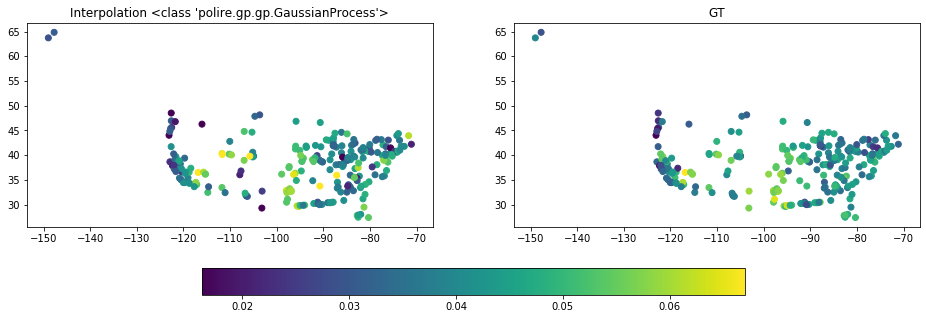

In [108]:
for r in lss:
    r.fit(trainX, trainy)
    try:
        fig, ax = plt.subplots(ncols=2, sharex=True, figsize=(16, 5))
        pred_y = r.predict(testX)
        vmin = min(testy)
        vmax = max(testy)
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        inter = ax[0].scatter(testX[:, 0], testX[:, 1], c = pred_y)
        ax[0].set_title(f"Interpolation {r.__class__}")
        gt = ax[1].scatter(testX[:, 0], testX[:, 1], c = testy)
        
        # normalize colorbar
        inter.set_norm(norm)
        gt.set_norm(norm)
        fig.colorbar(gt, ax=ax, orientation='horizontal', fraction=.1)
        
        ax[1].set_title("GT")
        plt.show()
        
    except NotImplementedError as e:
        print (f"Was not able to. for {r.__class__}!")
        print(str(e))

In [109]:
type(testX[:, 0])

numpy.ndarray

In [110]:
r.predict

<bound method Base.predict of <polire.gp.gp.GaussianProcess object at 0x7f5e55dd4390>>

In [111]:
lims = 1, 3, 3, 5
resolution = 12
x1min, x1max, x2min, x2max = lims
x1 = np.linspace(x1min, x1max, resolution)
x2 = np.linspace(x2min, x2max, resolution)
X1, X2 = np.meshgrid(x1, x2)